In [1]:
import lhef
import lorentz

https://github.com/RobertoFranceschini/PyLHEAnalysis

In [2]:
import matplotlib.pyplot as plt

In [3]:
import plotly.plotly as py

In [4]:
from bokeh.plotting import figure, show, output_notebook, output_file, reset_output, save#, push_notebook
output_notebook()

Loading BokehJS ...

In [5]:
import numpy as np
import math
import utils as u
import pandas as pd

In [6]:
import importlib

In [4]:
importlib.reload(lorentz)

<module 'lorentz' from '/Users/roberto/humanroot/utils/PyLHEanalysis/lorentz.py'>

In [5]:
importlib.reload(lhef)

<module 'lhef' from '/Users/roberto/humanroot/utils/PyLHEanalysis/lhef.py'>

In [7]:
def arange(a,b,s):
    return np.arange(a,b+s,s)

In [15]:
LHEfile=lhef.readLHE("unweighted_events.lhe")

In [16]:
nprinted=0
debug=False
nPrint=11
costheta_values=[] # create a vector where to store the computed values of costheta
abs_costheta_values=[] # and one for the abs
theta_values=[] # and one for the abs

for e in LHEfile: # loop on the events
    for p in e.particles: # loop on the particles of each event
        if p.status == 1 and p.id == 1000024: # check it is a final state and is a Chi+
            lv=p.fourvector() # make four vector
            obs=lv.cosTheta() # obtain the cosTheta
            costheta_values.append(obs) # append it to the vector of results
            abs_costheta_values.append(math.fabs(obs)) # and the abs(cosTheta)
            theta=lv.theta # obtain the theta angle
            theta_values.append(theta)
            if nprinted <nPrint: 
                if debug: print(p.px, p.py, p.pz, p.e)
                if debug: print(obs)
                nprinted+=1

https://bokeh.pydata.org/en/latest/docs/gallery.html
https://bokeh.pydata.org/en/latest/docs/gallery/histogram.html

In [17]:
hist, edges = np.histogram(theta_values,bins=arange(0,np.pi,0.2),normed=True)

p1 = figure(title="Chargino θ Distribution",#tools="save",
            background_fill_color="#E8DDCB")
p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p1.xaxis.axis_label = 'θ'
p1.yaxis.axis_label = 'dσ/dθ'

show(p1)

https://matplotlib.org/gallery.html
https://matplotlib.org/examples/statistics/histogram_demo_features.html

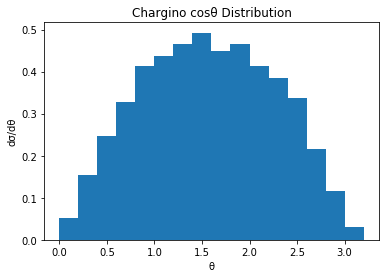

In [33]:
plt.hist(theta_values,bins=arange(0,np.pi,0.2),normed=True)
plt.title("Chargino θ Distribution")
plt.xlabel("θ")
plt.ylabel("dσ/dθ")
plt.show()

### Check with ROOT result

In [24]:
print(hist)
print(len(hist))
print(edges)
print(len(edges))


[ 0.052   0.1535  0.246   0.3275  0.4125  0.437   0.465   0.4925  0.4485
  0.4665  0.4145  0.385   0.3375  0.217   0.1155  0.0295]
16
[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8
  3.   3.2]
17


In [161]:
np.sum(hist)

10.0

In [162]:
df=pd.read_csv('./output/costheta_normalized_components_Chargino.txt',sep=' ',header=None, names=['c','pdf'])

In [163]:
df

c     pdf
0  -1.0  0.0511
1  -0.9  0.0529
2  -0.8  0.0544
3  -0.7  0.0524
4  -0.6  0.0514
5  -0.5  0.0454
6  -0.4  0.0495
7  -0.3  0.0487
8  -0.2  0.0479
9  -0.1  0.0430
10  0.0  0.0515
11  0.1  0.0474
12  0.2  0.0480
13  0.3  0.0487
14  0.4  0.0496
15  0.5  0.0524
16  0.6  0.0514
17  0.7  0.0511
18  0.8  0.0515
19  0.9  0.0517

In [164]:
df['pdf'].sum()

1.0000001000000001

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
c      20 non-null float64
pdf    20 non-null float64
dtypes: float64(2)
memory usage: 400.0 bytes


In [166]:
histpd=pd.DataFrame(hist)

In [167]:
histpd[0]

0     0.511
1     0.529
2     0.544
3     0.524
4     0.514
5     0.454
6     0.495
7     0.487
8     0.479
9     0.430
10    0.515
11    0.474
12    0.480
13    0.487
14    0.496
15    0.524
16    0.514
17    0.511
18    0.515
19    0.517
Name: 0, dtype: float64

In [168]:
df['pdf']/histpd[0]

0     0.1
1     0.1
2     0.1
3     0.1
4     0.1
5     0.1
6     0.1
7     0.1
8     0.1
9     0.1
10    0.1
11    0.1
12    0.1
13    0.1
14    0.1
15    0.1
16    0.1
17    0.1
18    0.1
19    0.1
dtype: float64

### Detector Acceptance

In [18]:
#del threshold;
def threshold(theta):
    _theta = np.pi/2 - np.abs(theta-np.pi/2)
    #print(_theta)
    if _theta > 19.0*np.pi/180.0 and _theta < 90.0*np.pi/180.0:
        return 4.4/np.sin(_theta)
    else:
        return np.infty

In [19]:
x=arange(0,np.pi,0.01);
y=[ threshold(_x) for _x in x ];

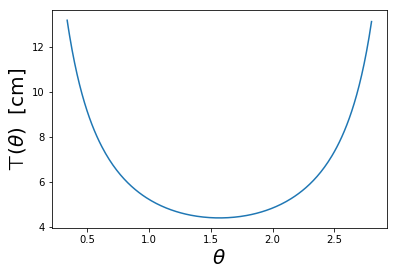

In [22]:
plt.plot(x,y)
plt.xlabel('$\\theta$',fontsize=20)
plt.ylabel('$\\top(\\theta)$  [cm]',fontsize=20)
plt.show()
#plt.savefig("d.png")

In [23]:
hist, edges = np.histogram(theta_values,bins=arange(0,np.pi,np.pi/180),normed=True)

### Survival probability

In [12]:
def BetaOfGamma(gamma):
    return math.sqrt(-1 + gamma**2)/gamma

In [13]:
def CDFexp(dist,gamma=1,cTau0=1):
    return 1 - np.exp(-(dist/(cTau0*gamma*BetaOfGamma(gamma))))
def FractionLeftAtDistance(dist,gamma=1,cTau0=1):
    return 1 - CDFexp(dist,gamma=gamma,cTau0=cTau0)

In [14]:
print(CDFexp(4.4,gamma=1.3,cTau0=4.99))
print(FractionLeftAtDistance(4.4,gamma=1.3,cTau0=4.99) )

0.654069898889
0.345930101111


### Residual Spectrum

In [25]:
def delimiters2midpoint(edges):
    return (edges[0:-1:1]+edges[1::1])/2

In [134]:
edges=arange(0,10,1)
print(edges)
print(delimiters2midpoint(edges))

[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5]


In [26]:
def hist_output2interpolation(hist,edges):
    return np.transpose(np.vstack((delimiters2midpoint(edges),hist)))

In [31]:
residual_spectrum = np.array([ [c_e[0], c_e[1]*FractionLeftAtDistance(threshold(c_e[0]),gamma=1.3,cTau0=10) ] for c_e in hist_output2interpolation(hist,edges) ])

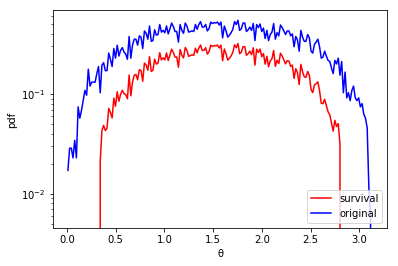

In [32]:
fig, ax = plt.subplots()
ax.plot(residual_spectrum[:,0],residual_spectrum[:,1],'r',label='survival')
ax.plot(hist_output2interpolation(hist,edges)[:,0],hist_output2interpolation(hist,edges)[:,1],'b',label='original')
plt.yscale('log')
plt.ylabel('pdf')
plt.xlabel('θ')
ax.legend(loc='lower right')
plt.show()